Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [1]:
%matplotlib inline

/home/yuzhong/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

In [2]:
import nsfg
df = nsfg.ReadFemPreg()

In [3]:
import numpy as np
import pandas
import thinkstats2
import thinkplot
import math

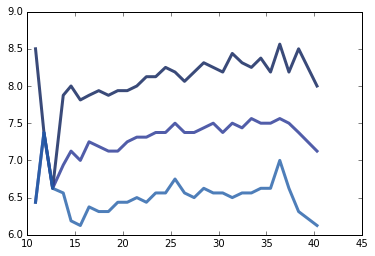

In [4]:

df = df.dropna(subset=['agepreg', 'totalwgt_lb'])
bins = np.arange(10, 40, 1)
indices = np.digitize(df['agepreg'], bins)
groups = df.groupby(indices)

for i, group in groups:
    agepreg = [group.agepreg.mean() for i, group in groups]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]
    
for percent in [75, 50, 25]:
    totalwgt_lb = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(agepreg, totalwgt_lb, label=label)

## Pearson’s Correlations

### Covariance Function

In [5]:
def Cov(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    xmean = xs.mean()
    ymean = ys.mean()
    
    return np.dot(xs-xmean, ys-ymean)/len(xs)


### Pearson's correlation function

In [6]:
def Corr(xs, ys):
    xvar = xs.var()
    yvar = ys.var()
    
    return Cov(xs, ys) / math.sqrt(xvar * yvar)

### Result

In [7]:
print "Pearson's correlation: ", thinkstats2.Corr(df.agepreg, df.totalwgt_lb)

Pearson's correlation:  0.0688339703541


## Spearman’s correlations

### Spearman’s correlation function

In [8]:
def SpearmanCorr(xs, ys):
    xranks = pandas.Series(xs).rank()
    yranks = pandas.Series(ys).rank()
    return Corr(xranks, xranks)

In [9]:
print "Spearman's correlation: ", thinkstats2.SpearmanCorr(df.agepreg, df.totalwgt_lb)

Spearman's correlation:  0.0946100410966


## Analysis

Both the Spearman's and Pearson's correlation indicates age of pregnancy and birth weight of babies are loosely related to each other. Spearman's is slightly higher than Pearson's, that may be cause by some outliers in the data as well as the possibility that the relation is not perfectly linear. 